In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read the CSV file
# Assuming the CSV file is named 'crop_data.csv' and is in the same directory as your notebook
data = pd.read_csv('crop_data.csv')

# Display the first few rows of the dataset
display(data.head())

# Check for any missing values
print("\nMissing values:")
display(data.isnull().sum())

# Display basic information about the dataset
display(data.info())

# Display summary statistics of the numerical columns
display(data.describe())

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice



Missing values:


N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


None

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
# Separate features and target
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
X = data[features]
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the SVM model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svm_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy*100:.2f}%")

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 96.82%

Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.78      0.91      0.84        23
 kidneybeans       0.91      1.00      0.95        20
      lentil       0.79      1.00      0.88        11
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.92      0.96        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00 

In [ ]:
# Function to predict crop for new data
def predict_crop(N, P, K, temperature, humidity, ph, rainfall):
    # Create input array
    input_data = np.array([[N, P, K, temperature, humidity, ph, rainfall]])

    # Scale the input
    input_scaled = scaler.transform(input_data)

    # Make prediction
    prediction = svm_model.predict(input_scaled)

    return prediction[0]

# Example usage of the prediction function
print("Example Prediction:")
sample_input = {
    'N': 90,
    'P': 42,
    'K': 43,
    'temperature': 20.87,
    'humidity': 82.00,
    'ph': 6.50,
    'rainfall': 202.93
}

predicted_crop = predict_crop(
    sample_input['N'],
    sample_input['P'],
    sample_input['K'],
    sample_input['temperature'],
    sample_input['humidity'],
    sample_input['ph'],
    sample_input['rainfall']
)

print(f"Recommended crop for the given conditions: {predicted_crop}")

Example Prediction:
Recommended crop for the given conditions: rice


C:\Users\himan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


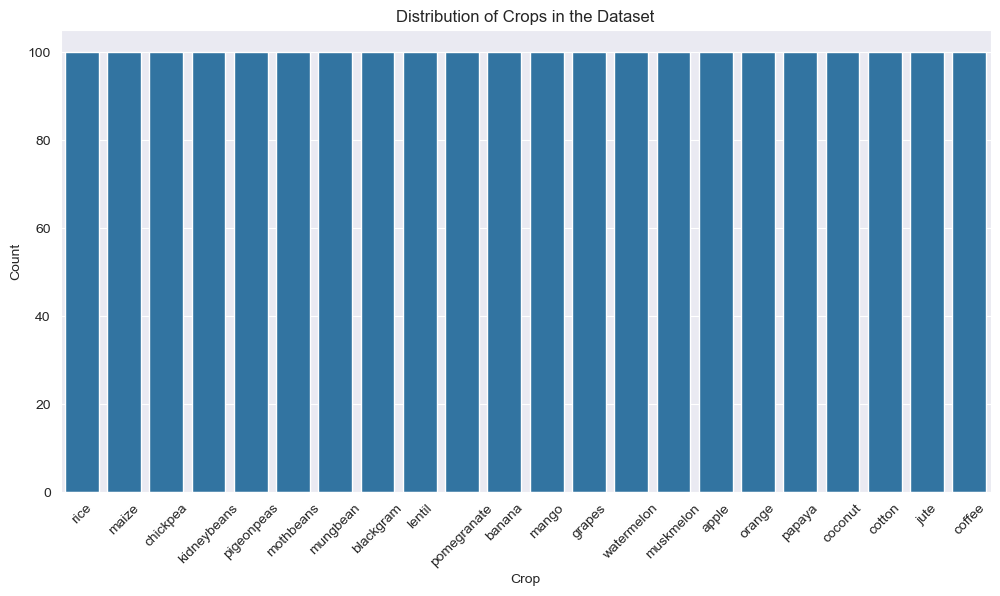

In [ ]:
# Visualize the distribution of crops in the dataset
plt.figure(figsize=(12, 6))
sns.countplot(x='label', data=data)
plt.title('Distribution of Crops in the Dataset')
plt.xlabel('Crop')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


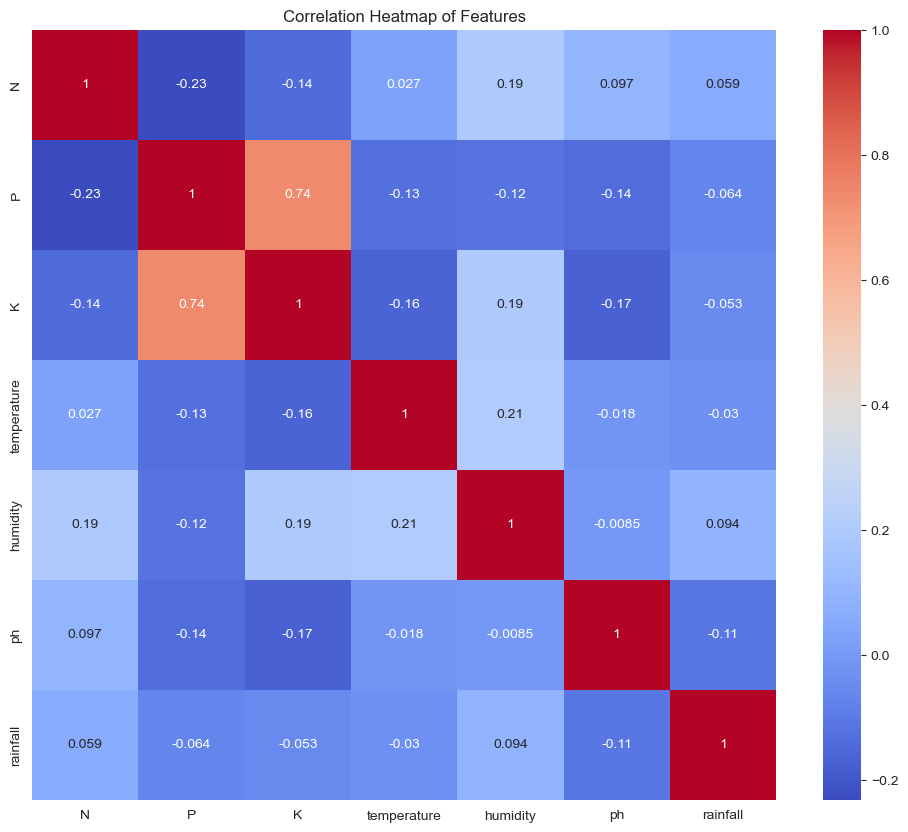

In [ ]:
# Visualize the correlation between features
plt.figure(figsize=(12, 10))
sns.heatmap(data[features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()

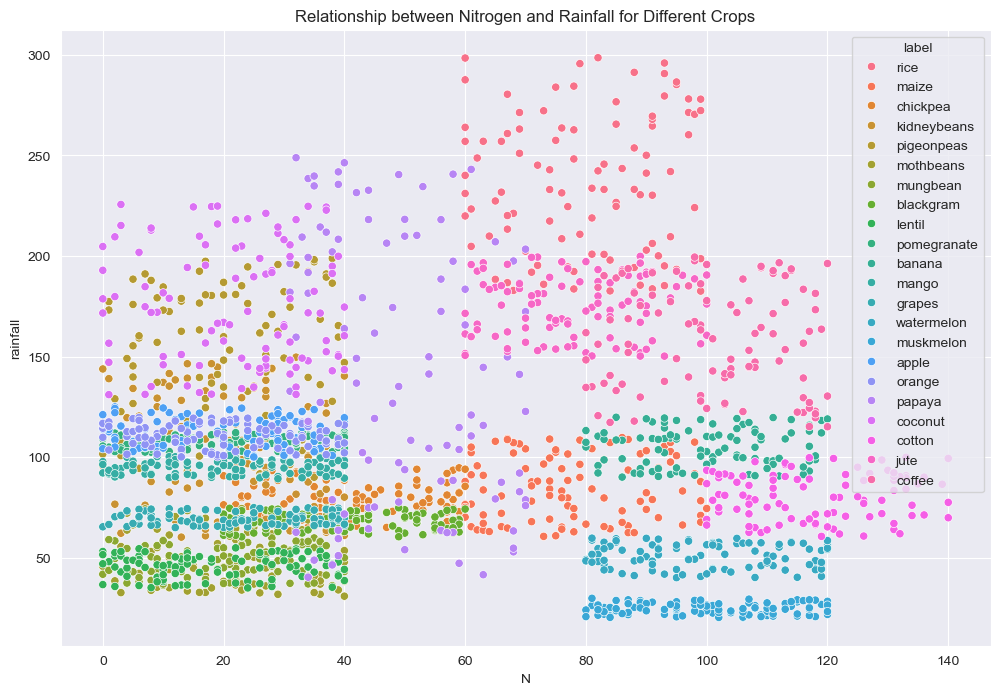

In [ ]:
# Visualize the relationship between two important features for each crop
plt.figure(figsize=(12, 8))
sns.scatterplot(x='N', y='rainfall', hue='label', data=data)
plt.title('Relationship between Nitrogen and Rainfall for Different Crops')
plt.show()

In [ ]:

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy*100:.2f}%")

Model Accuracy: 96.82%


In [ ]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier

In [ ]:
# Step 6: Train the SVM Model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [ ]:
# Step 7: Make Predictions
y_pred = svm_model.predict(X_test_scaled)

In [ ]:
# Step 8: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 96.82%

Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.78      0.91      0.84        23
 kidneybeans       0.91      1.00      0.95        20
      lentil       0.79      1.00      0.88        11
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.92      0.96        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00 

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [ ]:
# Assuming y_test are the true labels and y_pred are the predicted labels
y_test = [...]  # Replace with your test labels
y_pred = [...]  # Replace with your model predictions


In [ ]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

ValueError: unknown is not supported

In [ ]:
# Print results
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

NameError: name 'accuracy' is not defined

Accuracy: 1.00


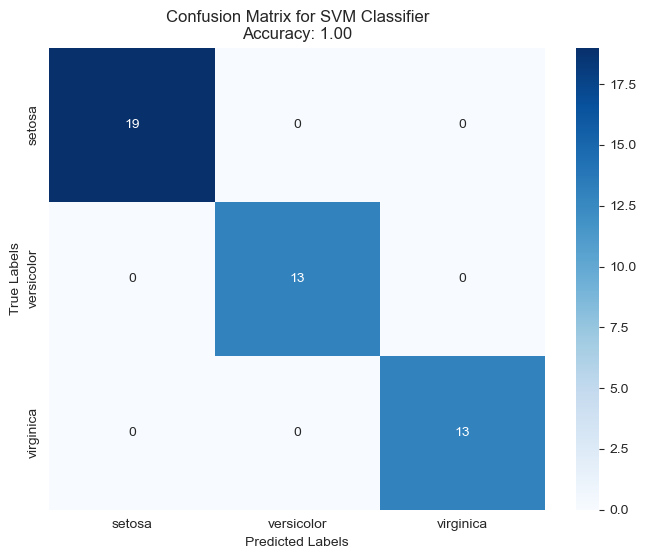

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load data and split into train and test sets
data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

# Initialize and train the SVM classifier
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

# Predict the test set
y_pred = svm.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title(f"Confusion Matrix for SVM Classifier\nAccuracy: {accuracy:.2f}")
plt.show()


In [ ]:
import pandas as pd

# Load the dataset

data = pd.read_csv('crop_data.csv')

# Display the first few rows of the dataset
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Separate features and target variable
X = data.drop(columns='label')
y = data['label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy, classification_rep

(0.9795454545454545,
 '              precision    recall  f1-score   support\n\n       apple       1.00      1.00      1.00        23\n      banana       1.00      1.00      1.00        21\n   blackgram       0.95      1.00      0.98        20\n    chickpea       1.00      1.00      1.00        26\n     coconut       1.00      1.00      1.00        27\n      coffee       0.94      1.00      0.97        17\n      cotton       0.94      1.00      0.97        17\n      grapes       1.00      1.00      1.00        14\n        jute       0.87      0.87      0.87        23\n kidneybeans       1.00      1.00      1.00        20\n      lentil       1.00      1.00      1.00        11\n       maize       1.00      0.95      0.98        21\n       mango       0.95      1.00      0.97        19\n   mothbeans       1.00      1.00      1.00        24\n    mungbean       1.00      1.00      1.00        19\n   muskmelon       1.00      1.00      1.00        17\n      orange       1.00      1.00      1

In [ ]:
import pickle

# Save the trained model and scaler to pickle files
with open('../svm_model.pkl', 'wb') as model_file:
    pickle.dump(svm_model, model_file)

with open('../scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

print("Model and Scaler saved as pickle files.")


NameError: name 'scaler' is not defined